### Linear Algebra with SciPy

So far you have essentially seen Pandas and a NumPy as main Python packages.  
The main Python package for Linear Algebra is the SciPy subpackage ```scipy.linalg``` which is build on NumPy.

In [99]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#### NumPy Arrays

Think of 1D NumPy array as a list of numbers. Think of 2D NumPy array as a matrix. Think of 3D NumPy array as a cube of numbers.

In [3]:
a = np.array([1,3,-2,1])
print(a)

[ 1  3 -2  1]


In [5]:
print("dimension:", a.ndim, " shape:", a.shape)

dimension: 1  shape: (4,)


In [9]:
print("number of entries in the array:", a.size)

number of entries in the array: 4


In [7]:
M = np.array([[1,2],[3,7],[-1,5]])
print(M)

[[ 1  2]
 [ 3  7]
 [-1  5]]


In [8]:
print("dimension:", M.ndim, " shape:", M.shape)

dimension: 2  shape: (3, 2)


In [10]:
print("number of entries in the array:", M.size)

number of entries in the array: 6


select a column:

In [11]:
col = M[:,1]
print(col)

[2 7 5]


In [12]:
print("dimension:", col.ndim, " shape:", col.shape)

dimension: 1  shape: (3,)


In [13]:
print("number of entries in the array:", col.size)

number of entries in the array: 3


Recall that a vector is 1 **column** matrix, so has shape (N, 1)

In [15]:
column = np.array(M[:,1]).reshape(3,1)
print(column)

[[2]
 [7]
 [5]]


In [16]:
print('Dimensions:', column.ndim)
print('Shape:', column.shape)
print('Size:', column.size)

Dimensions: 2
Shape: (3, 1)
Size: 3


#### Matrix Operations and Functions

Arithmetic operations : ```+```, ```-```, ```*```,```/``` and ```**``` performed element-wise on numpy arrays.

In [18]:
M = np.array([[3,4], [-1,5]])
print(M)

[[ 3  4]
 [-1  5]]


In [20]:
M + M

array([[ 6,  8],
       [-2, 10]])

In [21]:
M * M

array([[ 9, 16],
       [ 1, 25]])

Matrix Multiplication

We use the ```@``` operator

In [23]:
M @ M

array([[ 5, 32],
       [-8, 21]])

Exercise: compute $2I + 3A - AB$  
where $I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$ is the Identity Matrix,  
$A = \begin{pmatrix} 1 & 3 \\ -1 & 7 \end{pmatrix} \quad B = \begin{pmatrix} 5 & 2 \\ 1 & 2 \end{pmatrix}$ 

*Hint*: use ```np.eye(N)``` to create Identity of size $N$

#### Matrix Powers

In [24]:
from numpy.linalg import matrix_power as mpow

In [25]:
M = np.array([[3,4],[-1,5]])
print(M)

[[ 3  4]
 [-1  5]]


In [26]:
mpow(M,2)

array([[ 5, 32],
       [-8, 21]])

In [32]:
M @ M

array([[ 5, 32],
       [-8, 21]])

In [27]:
np.allclose(mpow(M,2), M @ M)

True

In [28]:
mpow(M,5)

array([[-1525,  3236],
       [ -809,    93]])

In [29]:
M @ M @ M @ M @ M

array([[-1525,  3236],
       [ -809,    93]])

In [31]:
np.allclose(mpow(M,5), M @ M @ M @ M @ M)

True

#### Transpose

We make the transpose with ```.T```

In [33]:
print(M)

[[ 3  4]
 [-1  5]]


In [34]:
print(M.T)

[[ 3 -1]
 [ 4  5]]


Note that $MM^T$ is a **symetric** matrix:

In [35]:
M @ M.T

array([[25, 17],
       [17, 26]])

#### Inverse

use ```scipy.linalg.inv```:

In [36]:
A = np.array([[1,2],[3,4]])
print(A)

[[1 2]
 [3 4]]


In [37]:
la.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

$AA^{-1} = A^{-1}A = I$

In [38]:
A @ la.inv(A)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

#### Trace

The Trace of a square (i.e. #rows = #cols) matrix is the sum of elements on the diagonal. 

In [39]:
print(A)

[[1 2]
 [3 4]]


In [40]:
np.trace(A)

5

#### Determinant

Basically, a square matrix is invertible (has an inverse) if its determinant is non zero. 

In [41]:
la.det(A)

-2.0

### Solving Linear systems

A linear system of $m$ equations with $n$ unknowns is a collection of linear equations:

\begin{cases} 
a_{11} x_1 + a_{12} x_2 + \cdots + a_{1n} x_n &= b_1 \\
a_{21} x_1 + a_{22} x_2 + \cdots + a_{2n} x_n &= b_2 \\
\vdots & \vdots \\
a_{m1} x_1 + a_{m2} x_2 + \cdots + a_{mn} x_n &= b_m \\
\end{cases}

In matrix notations, a linear system is $Ax = b$ where

$A = \begin{bmatrix}
a_{11} & a_{12} & \cdots &  a_{1n} \\
a_{21} & a_{22} & \cdots &  a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots &  a_{mn}
\end{bmatrix}, \quad x = \begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}, \quad b = \begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_m
\end{bmatrix}$


#### scipy.linalg.solve

We are mostly interested in linear systems $Ax = b$ where there is a unique solution $x$. This is the case when $A$ is a square matrix ($m=n$) and $det(A) \neq 0$. To solve such a system, we can use the function ```scipy.linalg.solve```. 

The function returns a solution of the system of equations $Ax = b$. For example:

In [48]:
A = np.array([[1,1],[1,-1]])
print(A)

[[ 1  1]
 [ 1 -1]]


In [49]:
b1 = np.array([2,0])
print(b1)

[2 0]


In [50]:
x1 = la.solve(A, b1)
print(x1)

[1. 1.]


Note that the output $x$ is returned as a 1D NumPy array when the vector $b$ (the right hand side) is entered as a 1D NumPy array. If we input $b$ as a 2D NumPy array, then the output is a 2D NumPy array. For example:

In [58]:
A = np.array([[1,1],[1,-1]])
b2 = np.array([2,0]).reshape(2,1)
x2 = la.solve(A, b2)
print(x2)

[[1.]
 [1.]]


We can verify the solution by computing the inverse os $A$:

In [59]:
A_inv = la.inv(A)
print(A_inv)

[[ 0.5  0.5]
 [ 0.5 -0.5]]


And multiply $A^{-1} b$ to solve for $x$:

In [60]:
x = A_inv @ b2
print(x)

[[1.]
 [1.]]


Finally, if the right hand side  is a matrix, then the output is a matrix of the same size. It is the solution of $Ax = b$ when $b$ is a matrix. For example:

In [52]:
A = np.array([[1,1],[1,-1]])
b3 = np.array([[2,2],[0,1]])
x3 = la.solve(A,b3)
print(x3)

[[1.  1.5]
 [1.  0.5]]


#### Exercise: compute the solution of the system:

\begin{cases} 
2x + y &= 1 \\
x + y &= 1
\end{cases}

And verify your result

#### Inverse or Solve?

Note that it is not a good idea to use the inverse $A^{-1}$ to solve $Ax = b$ if A is a very large matrix as it is too computationnally expensive (too many operations needed). It is therefore faster to use ```scipy.linalg.solve``` (about twice as fast).

### Application: Linear regression

Suppose we have $N$ points  
$$(x_1,y_1) \cdots (x_N,y_N)$$  
and we want to fit a line  
$$y = \beta_1 + \beta_2 x$$  
that "best fits" the data. Let's say that "best fits" means that the sum of the (square of the) distance of the points to the line is minimum, that is we want to minimize the Sum of Squared Errors (**SSE**):
$$SSE = \sum_{i=1}^N (y_i - \left(\beta_1 + \beta_2 x_i)\right)^2$$

Matrix formulation of the problem:  

$$X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}, \quad y = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}, \quad \beta = \begin{bmatrix}
\beta_1 \\
\beta_2
\end{bmatrix}
$$

then the **SSE** can be expressed as

$$SSE = || y - X \beta||^2$$

And the $\beta$ that minimizes **SSE** is the solution of the system

$$\left( X^TX \right) \beta = X^T y$$

Basically, you simply need to solve the system $Ax = b$ where $A = \left( X^TX \right),\quad x = \beta$ and $b = X^T y$

#### Reminder

Recall that $||v||$ represents the norm or magnitude (or length) of a vector $v$. For example, if $v = (4,3)$, $||v|| = \sqrt{4^2 + 3^2} = 5$.

In [68]:
v = np.array([4,3]).reshape(2,1)
print('v:', v)
print("\nnorm of v:", la.norm(v))

v: [[4]
 [3]]

norm of v: 5.0


Which means that $|| y - X \beta||$ in the above represents the distance between the vector $y$ and the vector $X \beta$.

Let us simulate the data $(x_i, y_i)$:

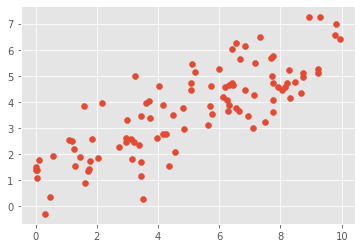

In [100]:
N = 100 # simulate 100 points
x = 10 * np.random.random((N,1)) # x from 0 to 10
# y = beta1 + beta2 * x + noise
y = 1 + 0.5 * x + np.random.randn(N,1)
plt.scatter(x,y);

**Goal**: use a linear regression to retrieve the coefficients $\beta_1$ and $\beta_2$

#### Exercise 1:
Construct the matrix $X$.

*Hint1*: use ```np.ones(N)``` to generate an array of 1.     

*Hint2*: use ```np.column_stack``` to stack together 1D arrays as columns of a 2D arrays (as usual try with a simple case if you're not sure and look at the help running e.g. ```np.column_stack?``` in an empty cell... please do it :) )

#### Exercise 2:
Use ```scipy.linalg.solve``` to solve $\left( X^TX \right) \beta = X^T y$ for $\beta$

How close are the retrieved coefficients $\hat{\beta_1}$ and $\hat{\beta_2}$ compares to the ones we used to simulate the data with?

#### Exercise 3:
Plot the linear regression you just computed (the line $y = \hat{\beta_1} + \hat{\beta_2} x)$ with the simulated data.

In [104]:
xs = np.linspace(0, 10, 100) # use 100 points evenly space between 0 to 10 as our x-axis
ys = ??

# plot the above (x,y) scatter plot of the sampled data

# add the regression line plot vs. xs
